In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
plt.rcParams['figure.figsize'] = [15, 7] 
import seaborn as sns

In [2]:
df = pd.read_excel('advertising_sales_data.xlsx')

# Data Assessment

## Summary

The dataset provides information on advertising expenditures across TV, Radio, and Newspapers, along with the corresponding product sales. It allows analysis of how spending in these areas impacts sales, making it useful for predictive modeling and understanding the effectiveness of different advertising strategies.

## Column Descriptions

- **Campaign**: This column likely represents different advertising campaigns.
- **TV**: This column represents the amount of money spent on advertising the product on television.
- **Radio**: This column indicates the advertising expenditure on radio.
- **Newspaper**: This column shows the advertising cost spent on newspaper advertising.
- **Sales**: This column represents the number of units sold corresponding to the advertising expenditures on TV, Radio, and Newspapers.

## Issues with dataset

1. Dirty Data
   - `Radio` column has 2 missing values.

In [3]:
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df[df.duplicated()]

,Campaign,TV,Radio,Newspaper,Sales


In [6]:
df[df['Radio'].isna()]

,Campaign,TV,Radio,Newspaper,Sales
19,camp20,147.3,NaN,19.1,14.6
152,camp153,197.6,NaN,14.2,16.6


In [7]:
df[df['TV']<0]

,Campaign,TV,Radio,Newspaper,Sales


In [8]:
df[df['Radio']<0]

,Campaign,TV,Radio,Newspaper,Sales


In [9]:
df[df['Newspaper']<0]

,Campaign,TV,Radio,Newspaper,Sales


In [10]:
df[df['Sales']<0]

,Campaign,TV,Radio,Newspaper,Sales


# Data Cleaning

In [11]:
import copy
df1 = df.copy(deep=True)

In [12]:
#Filling missing values of Radio column with mean
mean_Radio = df['Radio'].mean()
df1['Radio'] = df1['Radio'].fillna(mean_Radio)

In [13]:
df1 = df1.reset_index(drop=True)
df1.sample(5)

,Campaign,TV,Radio,Newspaper,Sales
53,camp54,182.6,46.2,58.7,21.2
148,camp149,38.0,40.3,11.9,10.9
140,camp141,73.4,17.0,12.9,10.9
97,camp98,184.9,21.0,22.0,20.5
40,camp41,202.5,22.3,31.6,16.6


# Exploratory Data Analysis

## 1.	What is the average amount spent on TV advertising in the dataset?

**`Conclusion:`**

- The average TV ad spend is $147, with spending widely distributed across campaigns.

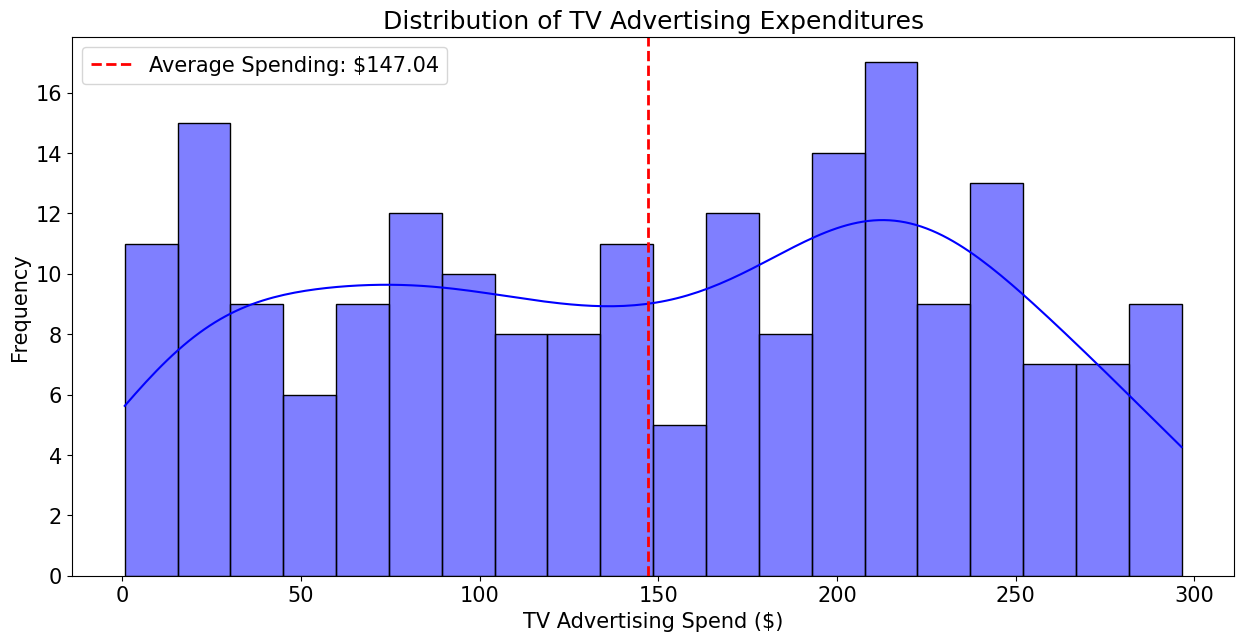

In [16]:
sns.histplot(df1['TV'], kde=True, color='blue', bins=20)
plt.axvline(df1['TV'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Average Spending: ${df1["TV"].mean():.2f}')
plt.title('Distribution of TV Advertising Expenditures')
plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2.	What is the correlation between radio advertising expenditure and product sales?

**`Conclusion:`**

- The moderate positive correlations (Pearson: 0.35, Spearman: 0.34) suggest that increases in radio advertising expenditure are associated with a slight increase in product sales.

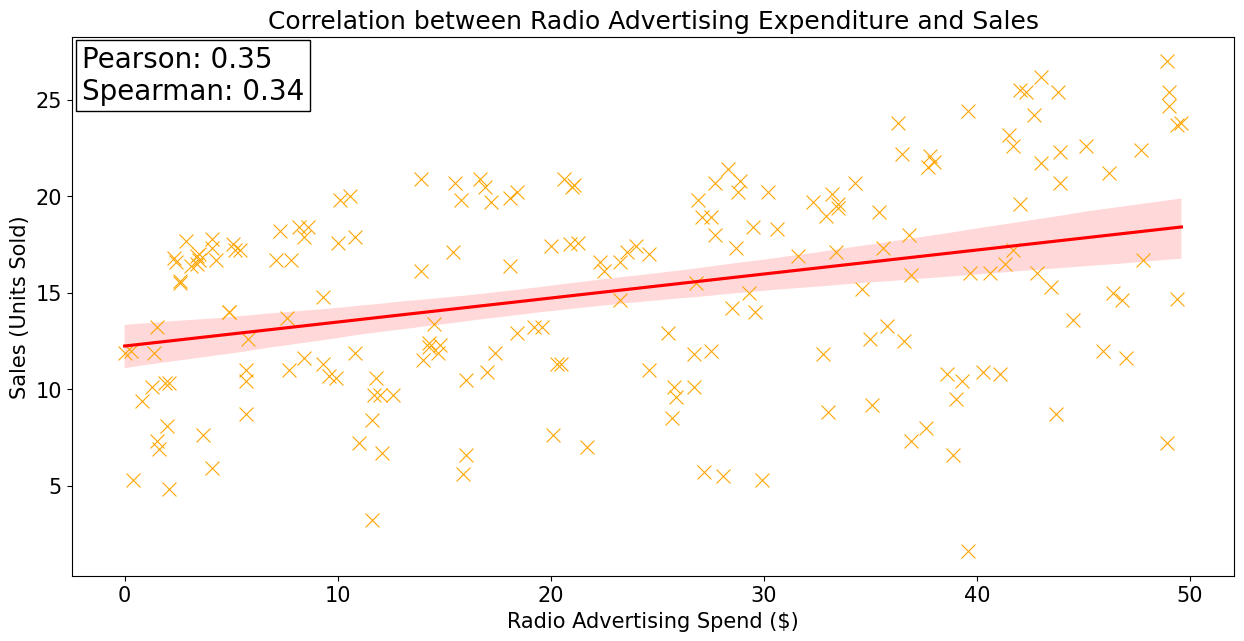

In [17]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson and Spearman correlation coefficients
pearson_corr, _ = pearsonr(df1['Radio'], df1['Sales'])
spearman_corr, _ = spearmanr(df1['Radio'], df1['Sales'])

sns.regplot(x=df1['Radio'], y=df1['Sales'], scatter=False, color='red',marker='x')
sns.scatterplot(x=df1['Radio'], y=df1['Sales'],color='orange',marker='x',s=100)
plt.title('Correlation between Radio Advertising Expenditure and Sales')
plt.xlabel('Radio Advertising Spend ($)')
plt.ylabel('Sales (Units Sold)')
plt.text(-2, 25, f'Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}', 
         fontsize=20, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

## 3.	Which advertising medium has the highest impact on sales based on the dataset?

**`Conclusion:`**

- TV advertising has the highest impact on sales, showing the strongest correlation compared to Radio and Newspaper.

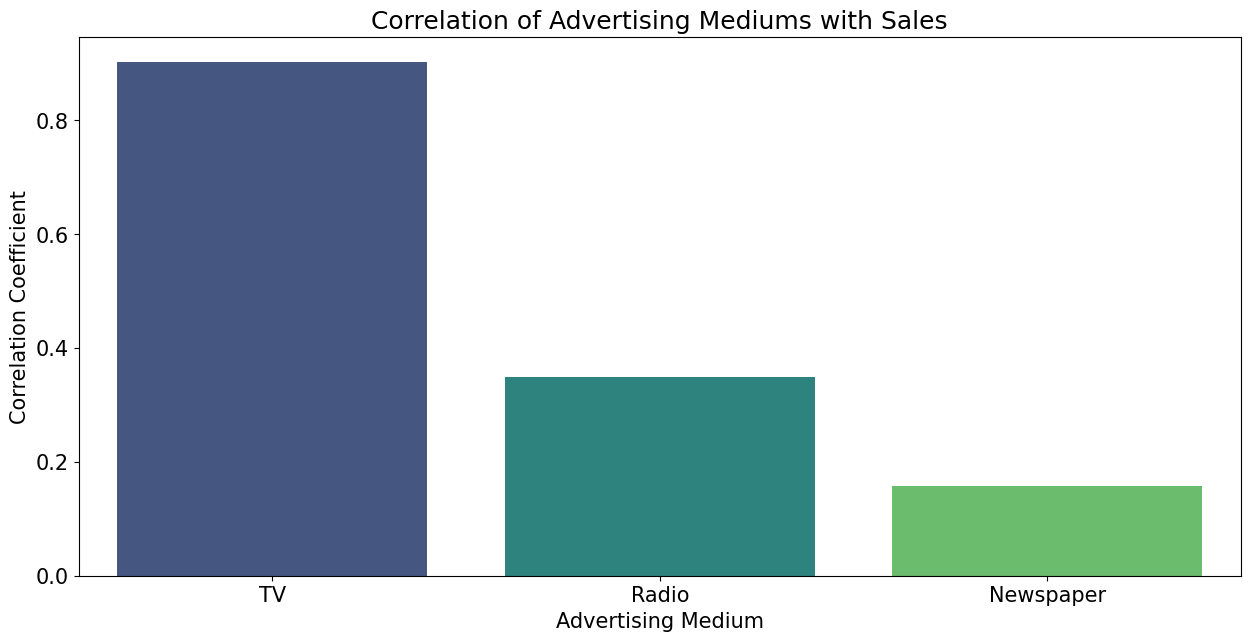

In [18]:
correlations = df1[['TV', 'Radio', 'Newspaper', 'Sales']].corr()['Sales'].drop('Sales')

# Plot the correlations
sns.barplot(correlations,palette='viridis')
plt.title('Correlation of Advertising Mediums with Sales')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Advertising Medium')
plt.show()

# Linear Regression

## Training the model

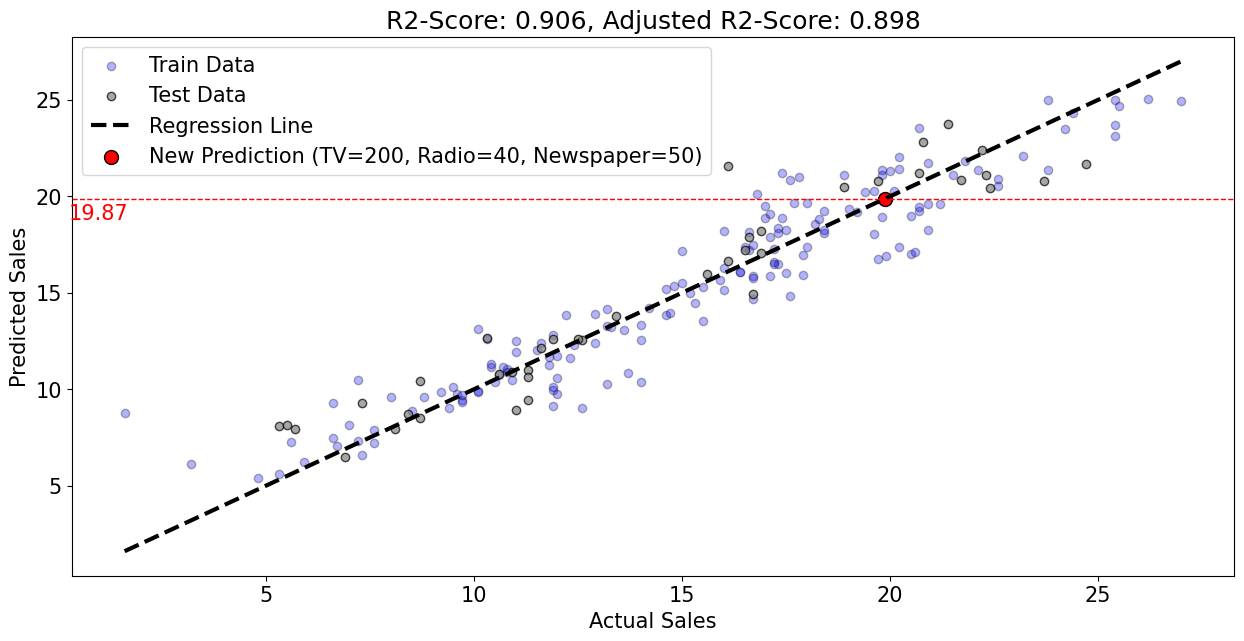

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = df1[['TV', 'Radio', 'Newspaper']]
y = df1['Sales']
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Plot the actual vs predicted sales for the test data
plt.scatter(y_train, model.predict(X_train), edgecolor = 'k', facecolor = 'blue', label='Train Data',alpha=0.3)

# Plot the test data points
plt.scatter(y_test, y_test_pred, edgecolor='k', facecolor='grey', label='Test Data',alpha=0.7)

# Plot the regression line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Regression Line')
new_expenditures = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_sales = model.predict(new_expenditures)[0]
plt.scatter(predicted_sales, predicted_sales, color='red', s=100, edgecolor='black', label='New Prediction (TV=200, Radio=40, Newspaper=50)')
plt.axhline(y=predicted_sales, color='red', linestyle='--', linewidth=1)
plt.text(y.min() + 0.1, predicted_sales-0.75, f'{predicted_sales:.2f}', color='red', va='center', ha='right')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
r2 = r2_score(y_test, y_test_pred)
n = X_test.shape[0]
k = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
plt.title(f'R2-Score: {r2:0.3f}, Adjusted R2-Score: {adj_r2:0.3f}')
plt.legend()
plt.show()



## Re-training after normalization

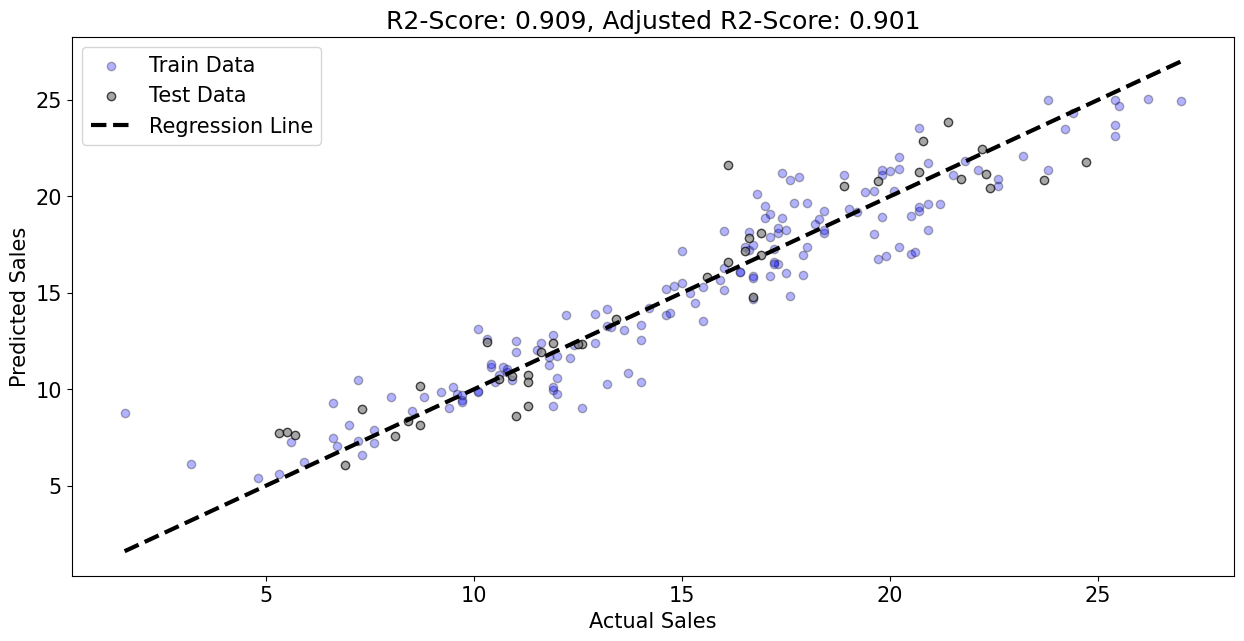

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = df1[['TV', 'Radio', 'Newspaper']]
y = df1['Sales']

# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
# Create a new linear regression model
model_normalized = LinearRegression()

# Train the model on the normalized training data
model_normalized.fit(X_train_norm, y_train)

# Predict on the normalized test data
y_test_pred = model_normalized.predict(X_test_norm)

# Plot the actual vs predicted sales for the normalized test data
plt.scatter(y_train, model_normalized.predict(X_train_norm), edgecolor = 'k', facecolor = 'blue', label='Train Data',alpha=0.3)

# Plot the test data points
plt.scatter(y_test, y_test_pred, edgecolor='k', facecolor='grey', label='Test Data',alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Regression Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
r2 = r2_score(y_test, y_test_pred)
n = X_test_norm.shape[0]
k = X_test_norm.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
plt.title(f'R2-Score: {r2:0.3f}, Adjusted R2-Score: {adj_r2:0.3f}')
plt.legend()
plt.show()

## Training with only Radio and Newspaper as predictors

**`Conclusion:`**

- With only Radio and Newspaper, an R² of 0.119 means the model explains just 11.9% of sales variability. With all predictors, an R² of 0.906 shows 90.6% of variability is explained, highlighting TV's strong influence.

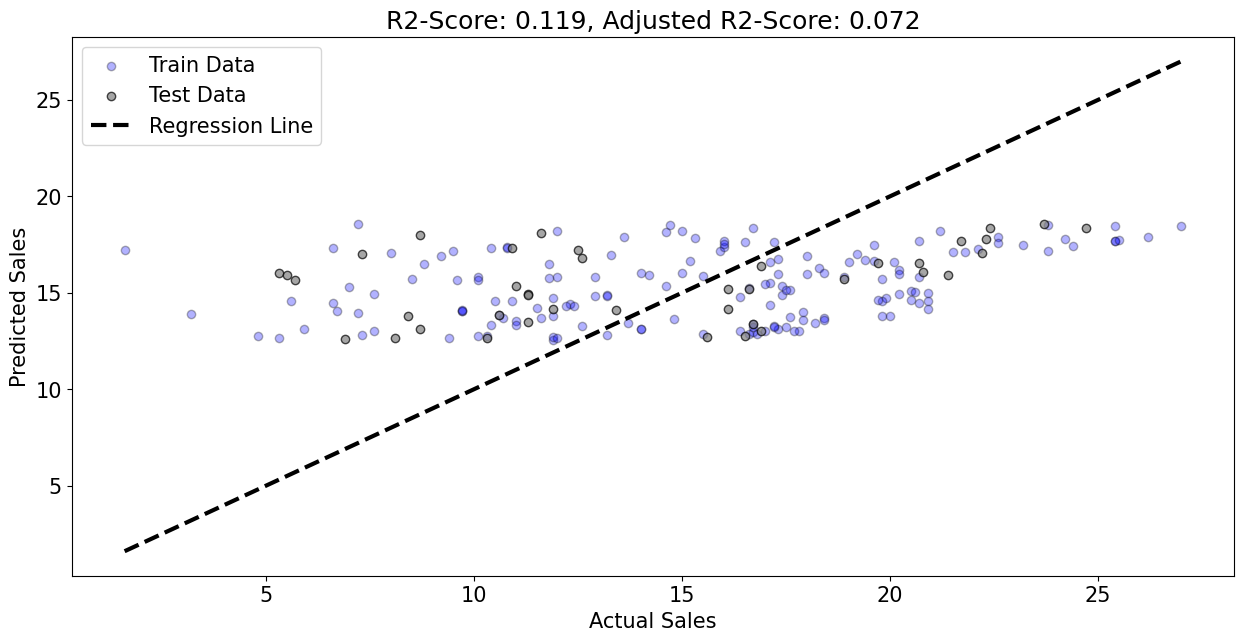

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = df1[['Radio', 'Newspaper']]
y = df1['Sales']

# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
# Create a new linear regression model
model_normalized = LinearRegression()

# Train the model on the normalized training data
model_normalized.fit(X_train_norm, y_train)

# Predict on the normalized test data
y_test_pred = model_normalized.predict(X_test_norm)

# Plot the actual vs predicted sales for the normalized test data
plt.scatter(y_train, model_normalized.predict(X_train_norm), edgecolor = 'k', facecolor = 'blue', label='Train Data',alpha=0.3)

# Plot the test data points
plt.scatter(y_test, y_test_pred, edgecolor='k', facecolor='grey', label='Test Data',alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Regression Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
r2 = r2_score(y_test, y_test_pred)
n = X_test_norm.shape[0]
k = X_test_norm.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
plt.title(f'R2-Score: {r2:0.3f}, Adjusted R2-Score: {adj_r2:0.3f}')
plt.legend()
plt.show()